In [13]:
import os
import csv
from sklearn.manifold import TSNE

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rc("font", size=14)
import matplotlib as mpl
mpl.rcParams['legend.frameon'] = 'True'

import seaborn as sns
sns.set(style="white")

In [14]:
def reduce_dim(_weights, components = 3):
    """Reduce dimensions of embeddings"""
    return TSNE(components, metric = 'cosine').fit_transform(_weights)

In [15]:
def weights_n_labels(filename):
    df = pd.read_csv(filename)
    cols = df.columns
    labels = df[cols[-1]]
    weights = df[cols[:-1]].to_numpy()
    if (weights.shape[1] > 2):
        reduced_weights = reduce_dim(weights, components = 2)
        return reduced_weights, labels
    else:
        return weights, labels

In [16]:
country_tiers = [['Nigeria','Vietnam','Paraguay','Ukraine','Mali','Congo','Albania','Sri Lanka','Zambia','Timor-Leste',
           "Cote D'Ivoire",'Bosnia and Herzegovina','South Africa','Nepal','Moldova','Yemen']
         ,
         ['The Democratic Republic of the Congo','Philippines','Kyrgyzstan','Iraq','Armenia','Georgia','Samoa',
        'Mozambique','Tajikistan','Cambodia','Azerbaijan']
         ,
         ['Nicaragua','Chile','Jordan','South Sudan','Benin','Bolivia','Pakistan','Mongolia','Burundi','Lebanon']
         ,
         ['Uganda','Indonesia','Rwanda','Palestine','Senegal','Costa Rica','Ghana','Peru','Cameroon','Honduras']
         ,
         ['Kosovo','Guatemala','Sierra Leone','Colombia','Burkina Faso','Turkey','Haiti',
             'El Salvador','Bulgaria','Mexico']
         ,
         ['Afghanistan','United States','Israel','Zimbabwe','Togo','Liberia','Dominican Republic','Kenya','Ecuador',
             'Tanzania']
         ,
         ['Gaza','Belize']]


status_colors = ['forestgreen','limegreen','lime','gold','orange','salmon','red']

In [17]:

def plot_embeddings(filename, output_filename, tiers=[], colors=[]):
    interesting_countries = ['Kenya','Ecuador','Nigeria']
    weights,labels = weights_n_labels(filename)
    fig1 = plt.figure(figsize=(20, 20))
    ax1 = fig1.add_subplot(1, 1, 1)
    ax1.scatter(weights[:,0], weights[:,1])

    plt.xlabel('TSNE 1',fontsize = 16)
    plt.ylabel('TSNE 2', fontsize=16)
    
    color_ = 'black'
    
    for i,txt in enumerate(labels):
        _fontsize = 14
        if (len(tiers) > 1):
            for tier, col in zip(tiers,status_colors):
                if (txt in tier):
                    color_ = col
                    break
        if txt in interesting_countries:
            _fontsize = 22
        ax1.annotate(txt, (weights[i,0], weights[i,1]), fontsize=_fontsize,color=color_)
        color_ = 'black'
    fig1.savefig(output_filename)

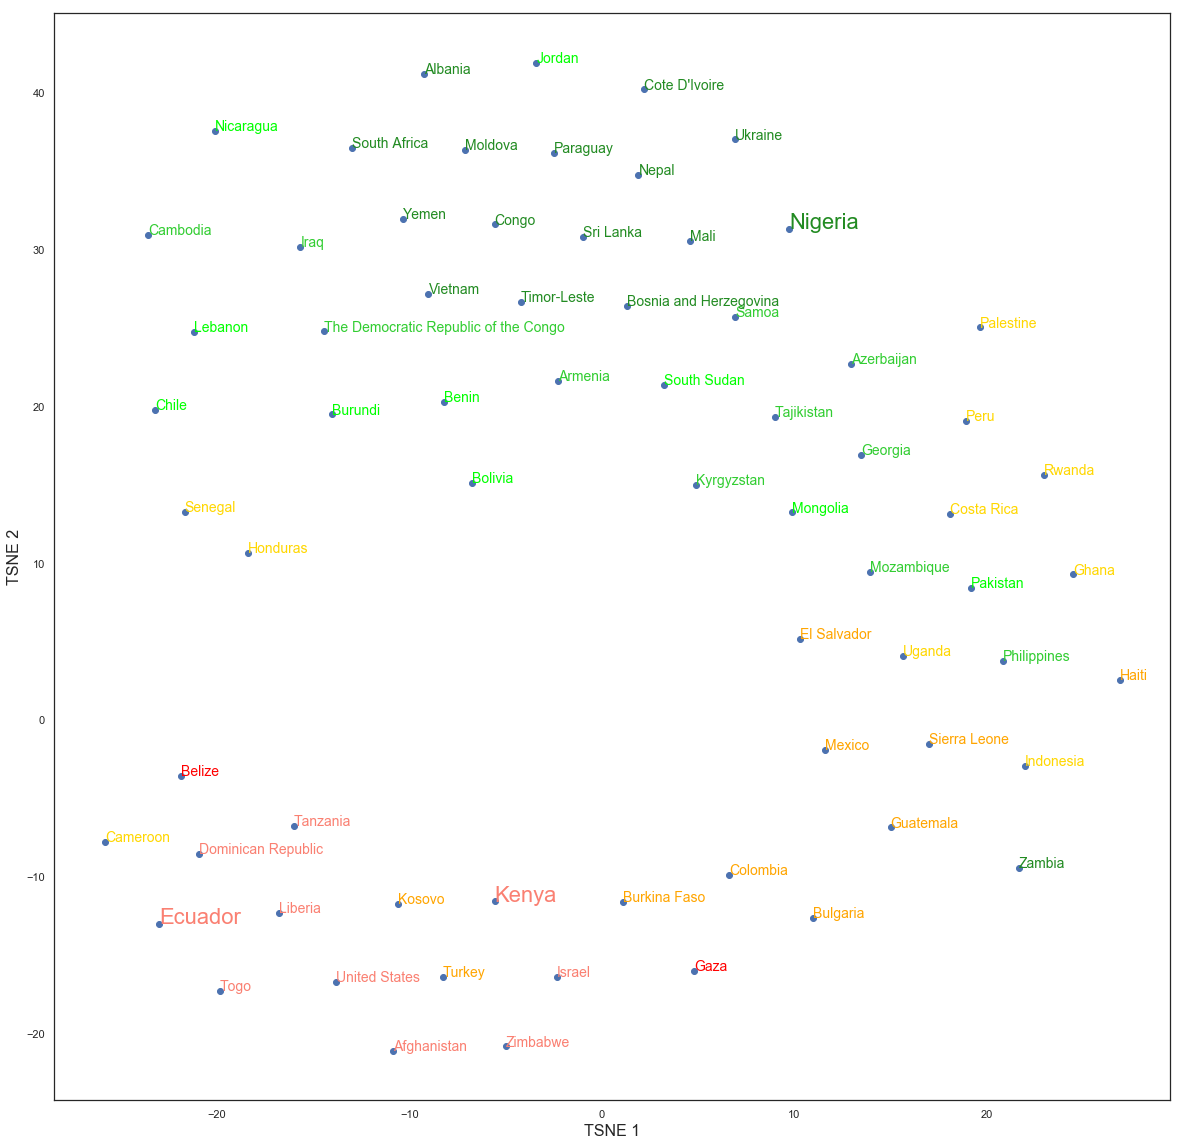

In [18]:
#plot_embeddings('Sector_embedding.csv')
plot_embeddings('Country_embedding.csv','Country_plot.png',country_tiers,status_colors)
#plot_embeddings('Activity_embedding.csv')

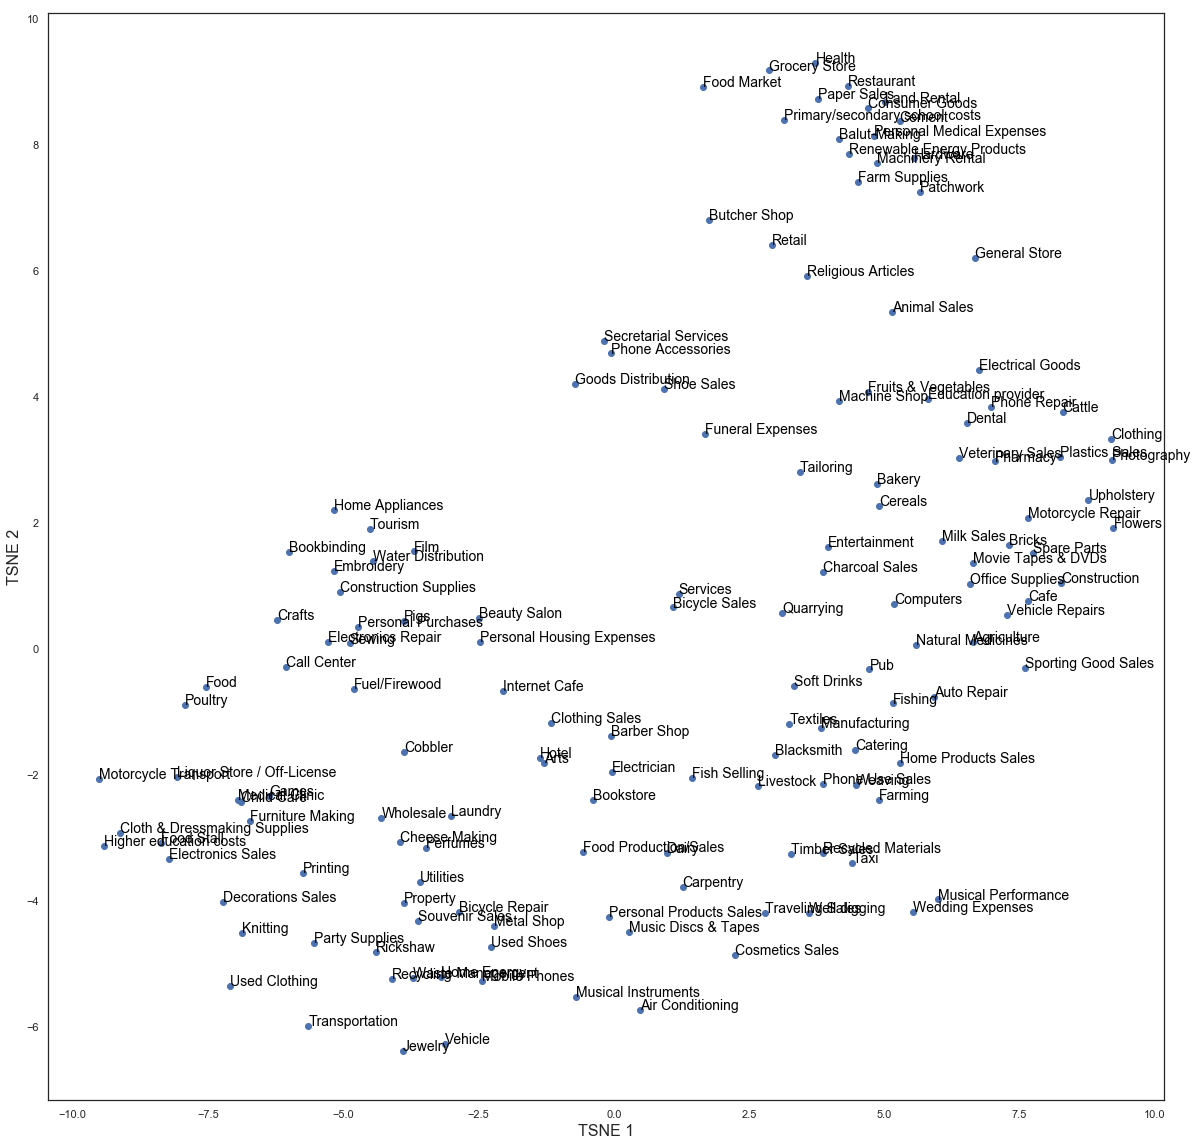

In [16]:
plot_embeddings('Activity_embedding.csv','Activity_embedding_plot.png')
#plot_embeddings('Country_embedding.csv',country_tiers,status_colors)
#plot_embeddings('Activity_embedding.csv')